In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

df = df.sample(frac=0.1, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [2]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
30001,Apple iPhone 5c 32GB (Blue) - AT&T,Apple,274.95,5,What an upgrade compared to the iPhone 4. Goin...,7.0
313198,Samsung Galaxy Grand Prime DUOS G531H/DS - Gra...,Samsung,179.99,4,I liked it at first but is starting to lag alr...,0.0
138219,"BLU Studio 5.0 C HD Unlocked Cellphone, White",BLU,2000.00,4,very nice,0.0
66571,Apple iPhone 6s 64 GB International Warranty U...,Apple,689.95,1,It is not a new one. The tagboard on the box w...,0.0
109303,BLU Dash J Unlocked Phone - Retail Packaging -...,BLU,39.99,1,This phone was truly a terrible purchase!! It ...,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41384 entries, 394349 to 109303
Data columns (total 6 columns):
Product Name    41384 non-null object
Brand Name      34846 non-null object
Price           40762 non-null float64
Rating          41384 non-null int64
Reviews         41374 non-null object
Review Votes    40194 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ MB


In [4]:
df.describe()

,Price,Rating,Review Votes
count,40762.000000,41384.000000,40194.000000
mean,227.626005,3.815170,1.498109
std,276.992862,1.551391,8.452564
min,1.730000,1.000000,0.000000
25%,79.950000,3.000000,0.000000
50%,140.000000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2408.730000,5.000000,524.000000


In [5]:
df.dropna(inplace=True)
df = df[df['Rating'] != 3]

df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [80]:
df['Positively Rated'].mean()

0.7471776686078667

# Visualization

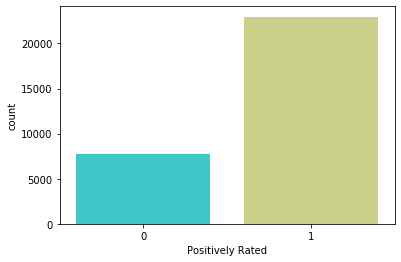

In [6]:
sns.countplot(x="Positively Rated", data=df, palette="rainbow")

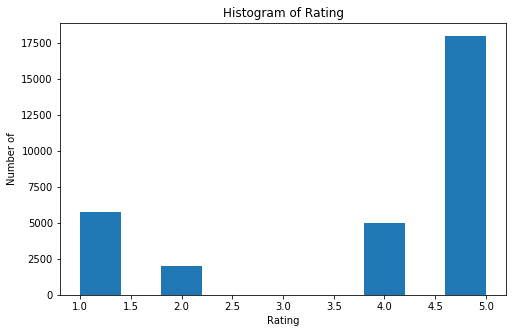

In [7]:
import matplotlib.pyplot as plt
df['Rating'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Rating') # add a title to the histogram
plt.ylabel('Number of') # add y-label
plt.xlabel('Rating') # add x-label

plt.show()

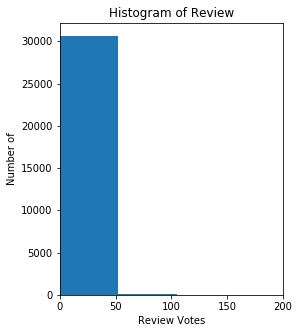

In [8]:
df['Review Votes'].plot(kind='hist', figsize=(4,5))

plt.title('Histogram of Review') # add a title to the histogram
plt.ylabel('Number of') # add y-label
plt.xlabel('Review Votes') # add x-label
plt.axis([0,200,None,None])

plt.show()

In [9]:
df["Reviews"]=df["Reviews"].str.lower()

In [10]:
df.dtypes

Product Name         object
Brand Name           object
Price               float64
Rating                int64
Reviews              object
Review Votes        float64
Positively Rated      int32
dtype: object

In [11]:
df["Reviews"]=df["Reviews"].astype('str')

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

lemmatizer = WordNetLemmatizer()

def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    words= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return [lemmatizer.lemmatize(word) for word in words] 

In [13]:
df['Reviews'].apply(text_process)

34377         [phone, needed, sim, card, would, nice, know]
248521    [3, month, away, upgrade, stratosphere, kept, ...
167661                           [experience, want, forget]
73287          [great, phone, work, according, expectation]
277158    [fell, love, phone, everything, suppose, 3g, n...
                                ...                        
30001     [upgrade, compared, iphone, 4, going, love, ph...
313198    [liked, first, starting, lag, already, also, a...
138219                                               [nice]
66571     [new, one, tagboard, box, changed, checked, se...
109303    [phone, truly, terrible, purchase, 4gb, intern...
Name: Reviews, Length: 30737, dtype: object

In [14]:
X= df["Reviews"]
y=df['Positively Rated']

# CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=5)
vect = cv.fit(X)
X_vect = vect.transform(X)
print(X_vect.shape)

(30737, 6360)


In [21]:
df1= pd.DataFrame(X_vect.toarray(), columns= cv.get_feature_names())
df1

,00,000,01,02,04,06,07,09,10,100,...,zenfone,zenfone2,zero,zippy,zone,zoom,zooming,zte,ítem,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=0)

In [23]:
X_train

<24589x6360 sparse matrix of type '<class 'numpy.int64'>'
	with 634211 stored elements in Compressed Sparse Row format>

# Multinomial Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,accuracy_score

classifier= MultinomialNB()
classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)

print('AUC: ', roc_auc_score(y_test, predictions)) # Area under curve score
print('Accuracy Score ', accuracy_score(y_test, predictions))

AUC:  0.8804468980377277
Accuracy Score  0.9154196486662329


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score

classifier1= LogisticRegression()

classifier1.fit(X_train,y_train)
predictions1 = classifier1.predict((X_test))

print('AUC: ', roc_auc_score(y_test, predictions1))
print('Accuracy: ', accuracy_score(y_test, predictions1))

C:\Users\vinti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.8968248590633131
Accuracy:  0.9311971372804164


In [26]:
# These reviews predicted
print(classifier1.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


In [27]:
sorted_coef_index = classifier1.coef_[0].argsort()
feature_names = np.array(vect.get_feature_names())

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'terrible' 'slow' 'junk' 'garbage' 'horrible' 'sucks' 'waste'
 'poor' 'useless']

Largest Coefs: 
['excelent' 'excelente' 'excellent' 'perfectly' 'love' 'perfect' 'exactly'
 'great' 'awesome' 'loves']


# Tfidf

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=5)
vect1 = tf.fit(X)
X_vect1 = vect1.transform(X)
print(X_vect1.shape)

(30737, 6360)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vect1, y, test_size=0.2, random_state=0)

# Multinomial Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,accuracy_score

classifier= MultinomialNB()
classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)

print('AUC: ', roc_auc_score(y_test, predictions))
print('Accuracy Score ', accuracy_score(y_test, predictions))

AUC:  0.8291111615531946
Accuracy Score  0.9035458685751464


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score

classifier1= LogisticRegression()
classifier1.fit(X_train,y_train)

predictions = classifier1.predict(X_test)

print('AUC: ', roc_auc_score(y_test, predictions))
print('Accuracy Score ', accuracy_score(y_test, predictions))

C:\Users\vinti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.8899866629625613
Accuracy Score  0.9303838646714379


In [32]:
# These reviews predicted
print(classifier1.predict(vect1.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


In [33]:
feature_names = np.array(vect1.get_feature_names())
sorted_coef_index = classifier1.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'terrible' 'worst' 'never' 'return' 'doesn'
 'waste' 'horrible']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome'
 'far' 'perfectly']


In [34]:
sorted_tfidf_index = X_vect1.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['disabling' 'ft' '61' 'additions' 'combining' 'printer' 'circumference'
 '5v' 'adjustment' 'realistic']

Largest tfidf: 
['handy' 'marvelous' 'brilliant' 'too' 'medium' 'kool' 'me' 'bad' 'top'
 'tops']


# n-grams & tfidf

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect2 = TfidfVectorizer(min_df=10, ngram_range=(1,3)).fit(X)
X_vect2 = vect2.transform(X)

print(X_vect2.shape)

(30737, 26513)


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vect2, y, test_size=0.2, random_state=0)
classifier1= LogisticRegression()
classifier1.fit(X_train,y_train)

C:\Users\vinti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
# These reviews are now correctly identified
print(classifier1.predict(vect2.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [101]:
print(classifier1.predict(vect2.transform(['phone is working smoothly , performance is good',
                                    'no issue, phone is working'])))

[1 1]


In [104]:
feature_names = np.array(vect2.get_feature_names())
sorted_coef_index = classifier1.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['not' 'slow' 'disappointed' 'never' 'bad' 'doesn' 'terrible' 'horrible'
 'worst' 'return']

Largest Coef: 
['great' 'love' 'good' 'excellent' 'perfect' 'best' 'awesome' 'excelente'
 'price' 'nice']



# n-grams & CountVectorizer

In [105]:
vect3 = CountVectorizer(min_df=5, ngram_range=(1,3)).fit(X)

X_vect3 = vect3.transform(X)

print(X_vect3.shape)

(30737, 59480)


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vect3, y, test_size=0.2, random_state=0)
classifier1= LogisticRegression()
classifier1.fit(X_train,y_train)

C:\Users\vinti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
#These reviews are now correctly identified
print(classifier1.predict(vect3.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [112]:
print(classifier1.predict(vect3.transform(['phone is working smoothly , performance is good',
                                    'no issue, phone is working','phone is not good'])))

[1 1 0]


In [109]:
feature_names = np.array(vect3.get_feature_names())
sorted_coef_index = classifier1.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['no good' 'junk' 'poor' 'not good' 'slow' 'broken' 'worst' 'terrible'
 'defective' 'horrible']

Largest Coef: 
['excellent' 'excelente' 'great' 'perfect' 'excelent' 'love' 'awesome'
 'no problems' 'good' 'not bad']

